<a href="https://colab.research.google.com/github/bonareri/Bitcoin-Prediction-Analysis/blob/main/Bitcoin_data_collection_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data collection

In [ ]:
!pip install yfinance pandas

In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import requests

# Set seaborn style for better visualization
sns.set_style("darkgrid")

In [24]:
# Define the coins to compare
COINS = {
    "bitcoin": "BTC-USD",
    "ethereum": "ETH-USD",
    "solana": "SOL-USD"
}

# Function to get circulating supply from CoinGecko
def get_circulating_supply(coin_id):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        return data["market_data"].get("circulating_supply", None)
    except requests.exceptions.RequestException as e:
        print(f"Error fetching supply for {coin_id}: {e}")
        return None

# Function to fetch historical price data
def fetch_crypto_data(coin_id, ticker):
    print(f"Fetching data for {coin_id.upper()}...")

    crypto = yf.Ticker(ticker)
    df = crypto.history(period="max")

    if df.empty:
        print(f"Error: No historical data found for {coin_id}.")
        return None

    # Format data
    df.reset_index(inplace=True)
    df["Date"] = pd.to_datetime(df["Date"]).dt.strftime('%Y-%m-%d')

    # Get circulating supply
    circulating_supply = get_circulating_supply(coin_id)

    # Calculate Market Cap
    df["Market Cap"] = df["Close"] * circulating_supply if circulating_supply else None

    # Keep relevant columns
    df = df[["Date", "Close", "High", "Low", "Open", "Volume", "Market Cap"]]

    # Add coin name
    df.insert(0, "Coin", coin_id.upper())

    return df

# Main function
def main():
    all_data = []

    for coin_id, ticker in COINS.items():
        df = fetch_crypto_data(coin_id, ticker)
        if df is not None:
            all_data.append(df)

    if all_data:
        final_df = pd.concat(all_data)
        final_df.to_csv("crypto_data.csv", index=False)
        print("Data saved to crypto_data.csv")
    else:
        print("No data to save.")

if __name__ == "__main__":
    main()

Fetching data for BITCOIN...
Fetching data for ETHEREUM...
Fetching data for SOLANA...
Data saved to crypto_data.csv


In [51]:
#load data
df = pd.read_csv('/content/crypto_data.csv')

In [52]:
df.head()

,Coin,Date,Close,High,Low,Open,Volume,Market Cap
0,BITCOIN,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,9.066291e+09
1,BITCOIN,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,8.414192e+09
2,BITCOIN,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,7.826523e+09
3,BITCOIN,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,8.106203e+09
4,BITCOIN,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,7.906316e+09


In [53]:
df.tail()

,Coin,Date,Close,High,Low,Open,Volume,Market Cap
8226,SOLANA,2025-02-10,200.356354,208.827499,196.380768,200.498245,4106376694,9.783178e+10
8227,SOLANA,2025-02-11,197.982361,205.924194,195.321503,200.358917,3907611299,9.667259e+10
8228,SOLANA,2025-02-12,196.773804,198.449814,189.608429,197.983856,4290836657,9.608247e+10
8229,SOLANA,2025-02-13,194.460953,198.260757,189.427719,196.773804,2755407329,9.495313e+10
8230,SOLANA,2025-02-14,202.620575,202.620575,194.376053,194.376053,3067974400,9.893738e+10


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231 entries, 0 to 8230
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Coin        8231 non-null   object 
 1   Date        8231 non-null   object 
 2   Close       8231 non-null   float64
 3   High        8231 non-null   float64
 4   Low         8231 non-null   float64
 5   Open        8231 non-null   float64
 6   Volume      8231 non-null   int64  
 7   Market Cap  8231 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 514.6+ KB


## Data cleaning

### Date column

In [55]:
#convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [56]:
# having the Date as the index allows for easy slicing, filtering, and applying time-based functions.
df.set_index('Date', inplace=True)

In [57]:
#Sorting the data chronologically is essential to preserve the temporal order
df.sort_index(inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8231 entries, 2014-09-17 to 2025-02-14
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Coin        8231 non-null   object 
 1   Close       8231 non-null   float64
 2   High        8231 non-null   float64
 3   Low         8231 non-null   float64
 4   Open        8231 non-null   float64
 5   Volume      8231 non-null   int64  
 6   Market Cap  8231 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 514.4+ KB


In [59]:
df.head()

,Coin,Close,High,Low,Open,Volume,Market Cap
Date,,,,,,,
2014-09-17,BITCOIN,457.334015,468.174011,452.421997,465.864014,21056800,9.066291e+09
2014-09-18,BITCOIN,424.440002,456.859985,413.104004,456.859985,34483200,8.414192e+09
2014-09-19,BITCOIN,394.795990,427.834991,384.532013,424.102997,37919700,7.826523e+09
2014-09-20,BITCOIN,408.903992,423.295990,389.882996,394.673004,36863600,8.106203e+09
2014-09-21,BITCOIN,398.821014,412.425995,393.181000,408.084991,26580100,7.906316e+09


## Exploratory Data Analysis

### Summary Statistics

In [60]:
# summary statistics
df.describe()

,Close,High,Low,Open,Volume,Market Cap
count,8231.000000,8231.000000,8231.000000,8231.000000,8.231000e+03,8.231000e+03
mean,9992.823821,10207.195049,9745.294258,9981.369649,1.341688e+10,2.547583e+11
std,18816.012464,19201.542903,18371.163929,18793.123284,1.676706e+10,3.626204e+11
min,0.515273,0.559759,0.505194,0.513391,6.520200e+05,2.516021e+08
25%,196.810043,203.406967,188.855286,196.756042,1.290527e+09,1.974679e+10
50%,1567.398682,1604.704102,1534.088257,1567.179321,7.186143e+09,1.079808e+11
75%,8626.275391,8791.957031,8366.544922,8611.597656,2.021654e+10,3.330086e+11
max,106146.265625,109114.882812,105291.734375,106147.296875,3.509679e+11,2.104267e+12


### Frequency Distribution

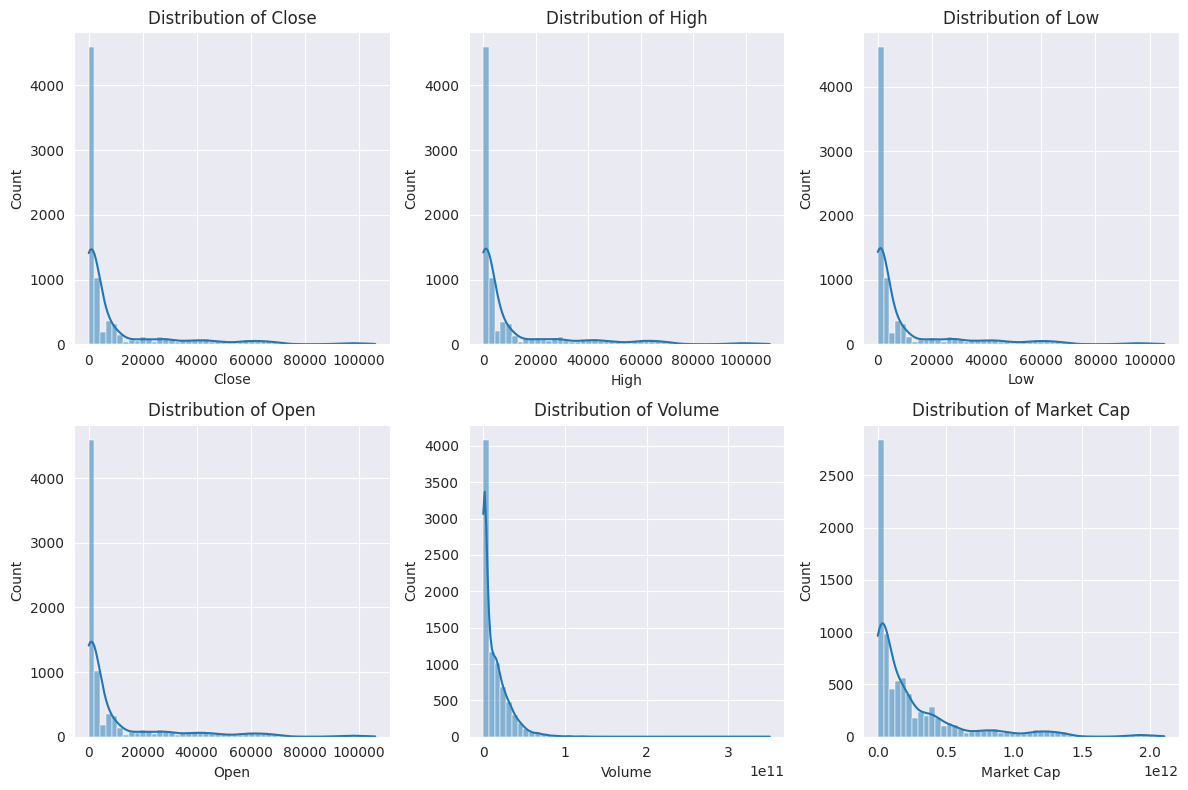

In [35]:
# List of numeric columns
numeric_cols = ["Close", "High", "Low", "Open", "Volume", "Market Cap"]

# Plot histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=50, kde=True)  # KDE=True overlays a Kernel Density Estimate
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### Price & Volume Correlation

<Axes: >

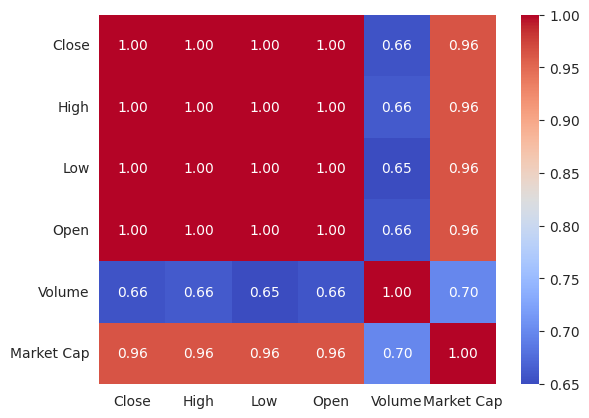

In [36]:
corr_matrix = df[['Close', 'High', 'Low', 'Open', 'Volume', 'Market Cap']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

### Closing Price Over Time

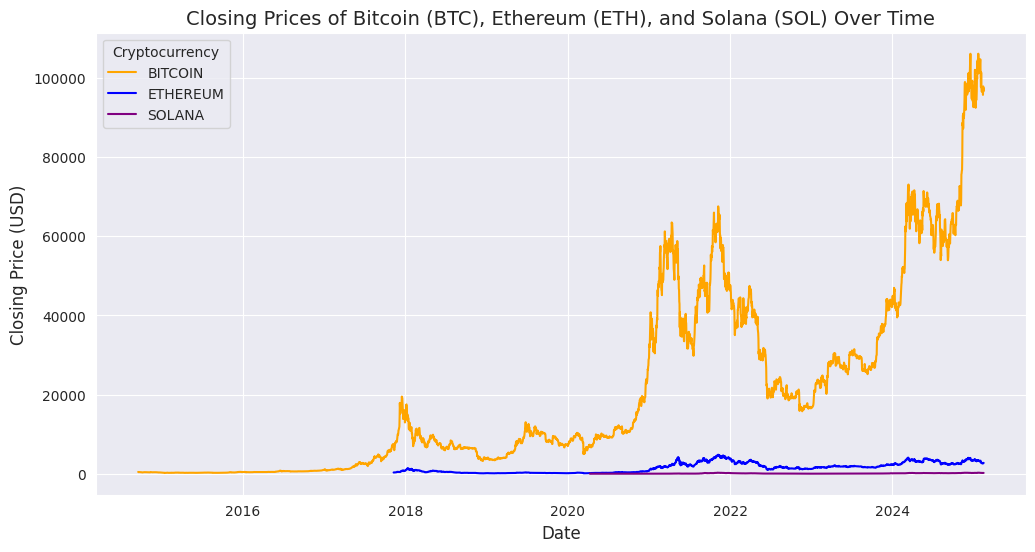

In [61]:
# Plot closing prices for BTC, ETH, and SOL
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y="Close", hue="Coin", palette=["orange", "blue", "purple"])

# Chart formatting
plt.title("Closing Prices of Bitcoin (BTC), Ethereum (ETH), and Solana (SOL) Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)
plt.legend(title="Cryptocurrency")
plt.grid(True)
plt.show()

### **Key Insights**

**1️⃣ Bitcoin (BTC) Dominates Price Trends**
- **BTC (orange)** remains the highest-priced cryptocurrency.
- Surged past **$100,000 in 2024**, showing strong market confidence.
- **Historical peaks in 2017, 2021, and 2024** indicate repeated bull cycles.

**2️⃣ Ethereum (ETH) Shows Moderate Growth**
- **ETH (blue)** has a much lower price range compared to BTC.
- Peaked around **$5,000** in previous bull cycles.
- **Gradual upward trend**, showing solid adoption.

**3️⃣ Solana (SOL) Remains Relatively Lower in Price**
- **SOL (purple)** shows price spikes after 2021 but remains below BTC & ETH.




### Market Capitalization

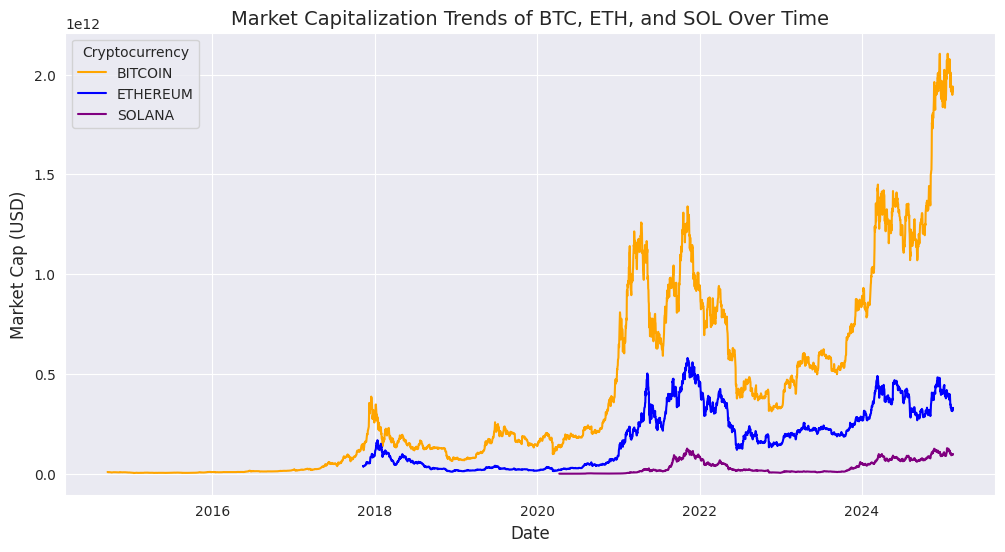

In [63]:
plt.figure(figsize=(12, 6))

# Plot Market Cap trends for each coin
sns.lineplot(data=df, x=df.index, y="Market Cap", hue="Coin", palette=["orange", "blue", "purple"])

# Chart formatting
plt.title("Market Capitalization Trends of BTC, ETH, and SOL Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Market Cap (USD)", fontsize=12)
plt.legend(title="Cryptocurrency")
plt.grid(True)

# Show the plot
plt.show()

### Market Capitalization Trends of BTC, ETH, and SOL

**1️⃣ Bitcoin (BTC) Leads the Market**
- **BTC (orange)** has the highest market capitalization, peaking above **$2 trillion**.
- Significant **growth during bull runs** (2017, 2021, 2024).
- **Recent 2024 surge** suggests renewed investor confidence.

**2️⃣ Ethereum (ETH) Shows Strong Growth**
- **ETH (blue)** follows BTC but at a lower magnitude.
- Peaked around **$500 billion** in 2021 but remains **steadily increasing**.
- Indicates **strong network utility and adoption**.

**3️⃣ Solana (SOL) Gains Traction**
- **SOL (purple)** had a late start but saw significant growth post-2021.
- **Smaller market cap** compared to BTC & ETH but shows steady **adoption and resilience**.

**4️⃣ Market Cycles Are Clearly Visible**
- **Boom and bust cycles** are evident (2021 bull run, 2022 bear market).
- **Post-2023 recovery** shows renewed market interest.



### Trading Volume Analysis

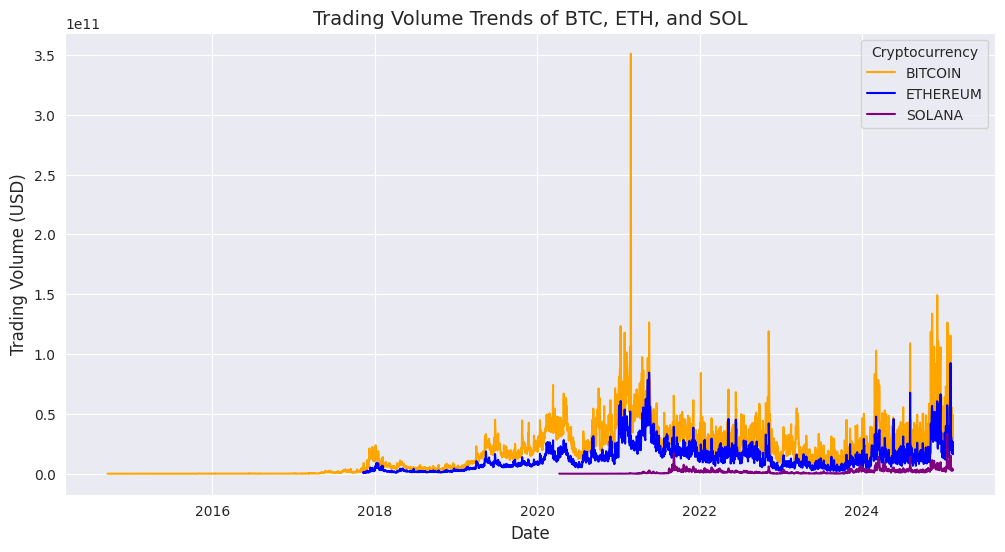

In [62]:
plt.figure(figsize=(12, 6))

# Plot volume trends for each coin
sns.lineplot(data=df, x=df.index, y="Volume", hue="Coin", palette=["orange", "blue", "purple"])

# Chart formatting
plt.title("Trading Volume Trends of BTC, ETH, and SOL", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Trading Volume (USD)", fontsize=12)
plt.legend(title="Cryptocurrency")
plt.grid(True)

# Show the plot
plt.show()

### Trading Volume Trends of BTC, ETH, and SOL   

1️⃣ Bitcoin (BTC) Dominates Trading Volume  
- **BTC (orange)** has the highest trading volume over time, especially during market peaks.  
- Major **spikes align with market cycles** (e.g., 2021 bull run).  

2️⃣ Ethereum (ETH) Has Consistently High Volume  
- **ETH (blue)** follows BTC’s trend but at a lower scale.  
- Shows **sustained liquidity**, indicating strong investor interest.  

3️⃣ Solana (SOL) Gained Traction Post-2020  
- **SOL (purple)** had minimal trading before 2020 but grew rapidly.  
- Lower volume than BTC & ETH, but **trading activity is increasing**.  

 4️⃣ Volume Spikes Correlate with Market Events  
- **2021:** Crypto bull run → **Highest trading activity ever recorded**.  
- **2022:** Market crash → **Sharp spikes, indicating panic selling**.  
- **2024:** Volume stabilizes but remains **volatile, especially for BTC**.  


### Daily Returns (Volatility)

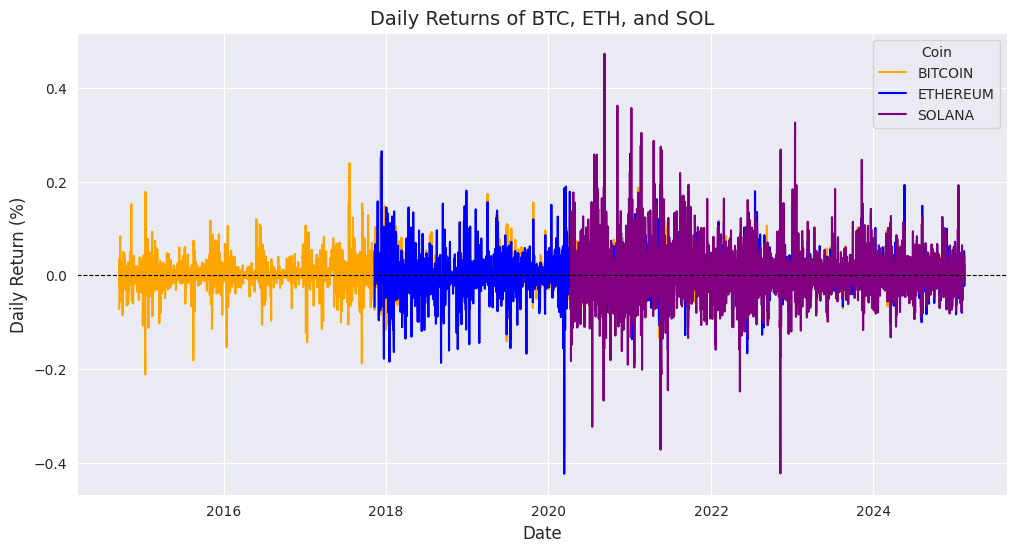

In [67]:
# Ensure no duplicate index issues
df = df.reset_index()

# Calculate Daily Returns
df["Daily Return"] = df.groupby("Coin")["Close"].pct_change()

# Plot Daily Returns
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Daily Return", hue="Coin", palette=["orange", "blue", "purple"])
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)  # Add a reference line at 0

# Formatting
plt.title("Daily Returns of BTC, ETH, and SOL", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Return (%)", fontsize=12)
plt.grid(True)
plt.show()

### Key Insights  

 1️⃣ Bitcoin (BTC) Has the Most Stable Daily Returns  
- **BTC (orange)** shows relatively smaller fluctuations compared to ETH & SOL.  
- This suggests **lower risk & more stability**, making it appealing for long-term investors.  

 2️⃣ Ethereum (ETH) Displays Higher Volatility Post-2017  
- **ETH (blue)** starts showing larger daily returns around 2017.  
- Significant **price swings** occur, aligning with major market cycles.  

 3️⃣ Solana (SOL) Has the Most Extreme Daily Swings  
- **SOL (purple)** exhibits **wild daily return fluctuations**, especially after 2020.  
- This suggests **high speculative trading** and market sensitivity.  

4️⃣ Crypto Market Volatility Peaks in Key Events  
- **2018:** Post-bull market crash → Large drops in ETH & BTC.  
- **2021:** Crypto bull run → High returns but also rapid corrections.  
- **2022:** Market downturn → SOL & ETH exhibit extreme drops.  




### Volatility Using Rolling Standard Deviation
Volatility measures how much prices fluctuate over time. Higher volatility indicates higher risk but also higher potential returns.

- Rolling Volatility (30-Day Standard Deviation)

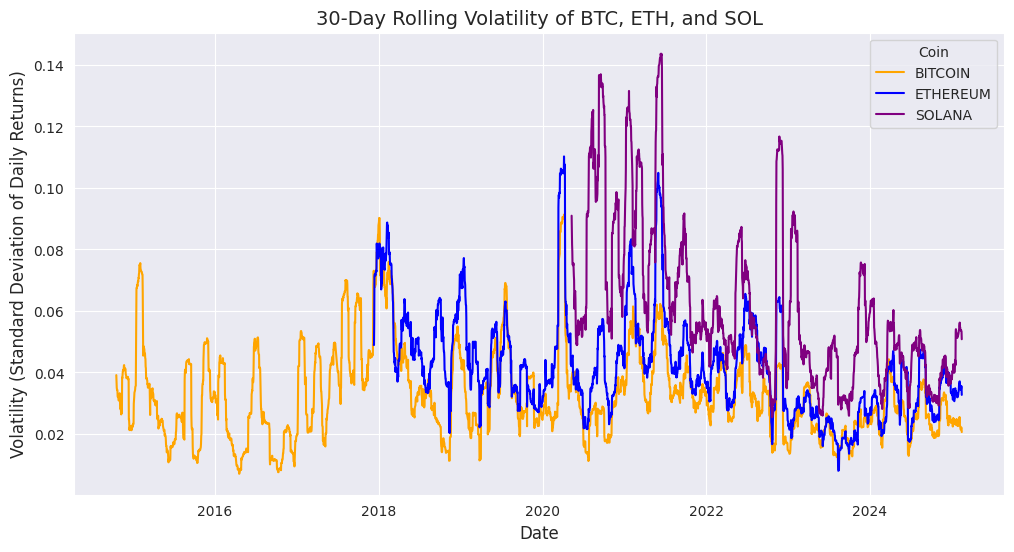

In [68]:
# Calculate Daily Returns
df["Daily Return"] = df.groupby("Coin")["Close"].pct_change()

# Calculate 30-day Rolling Volatility (Standard Deviation of Returns)
df["Rolling Volatility"] = df.groupby("Coin")["Daily Return"].transform(lambda x: x.rolling(window=30).std())

# Plot Rolling Volatility
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Rolling Volatility", hue="Coin", palette=["orange", "blue", "purple"])

# Formatting
plt.title("30-Day Rolling Volatility of BTC, ETH, and SOL", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volatility (Standard Deviation of Daily Returns)", fontsize=12)
plt.grid(True)
plt.show()

### Key Insights from the Volatility Analysis  

 1️⃣ Bitcoin (BTC) Shows the Most Stability  
- BTC (orange) maintains relatively low volatility over time.  
- This suggests it is more **established** and less reactive to short-term market movements.  

 2️⃣ Ethereum (ETH) and Solana (SOL) Are More Volatile  
- ETH (blue) experiences **moderate fluctuations**, especially during market shifts.  
- SOL (purple) has the **highest volatility**, with frequent sharp spikes.  
- Post-2021, **SOL's volatility exceeds ETH & BTC**, indicating **higher speculative activity**.  

3️⃣ Volatility Spikes Align with Major Market Events  
- 2018: Crypto market crash → Sudden surge in volatility.  
- 2020: Pandemic-driven uncertainty → Increased market swings.  
- 2021: **Bull run & corrections** → Highest volatility levels observed.  



### Correlation Matrix

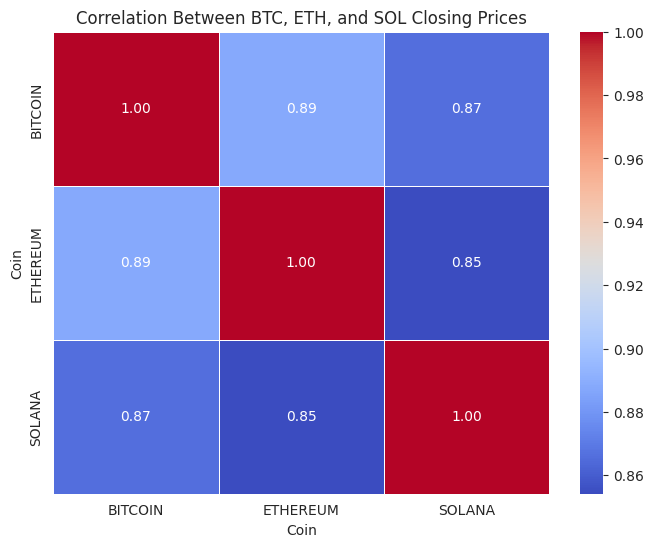

In [69]:
# Pivot the DataFrame to have coins as columns
df_pivot = df.pivot(index="Date", columns="Coin", values="Close")

# Compute the correlation matrix
correlation_matrix = df_pivot.corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Formatting
plt.title("Correlation Between BTC, ETH, and SOL Closing Prices")
plt.show()